# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [ ]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [ ]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [ ]:
y, X = patsy.dmatrices('tip ~ sex + time + smoker + net_bill', tips)

In [ ]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           2.64e-20
Time:                        19:29:09   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y, X = patsy.dmatrices('tip ~ net_bill', tips)

In [ ]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           5.02e-23
Time:                        19:29:09   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
tips['res_log'] = modelo.resid

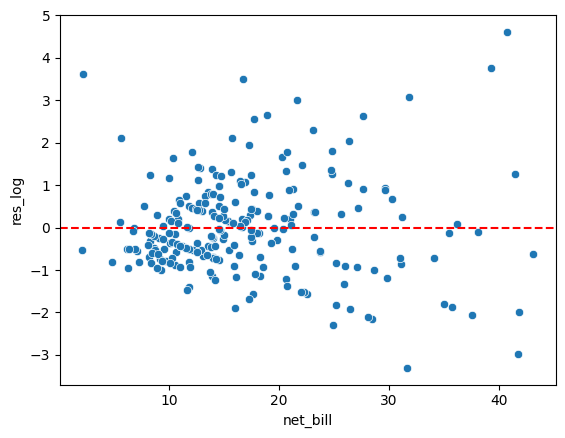

In [ ]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
y, X = patsy.dmatrices('tip ~ np.log(net_bill)', tips)

In [ ]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           4.40e-20
Time:                        19:29:10   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y, X = patsy.dmatrices('tip ~ np.power(net_bill, 2)', tips)

In [ ]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.47e-20
Time:                        19:29:10   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2566      0.104     21.720      0.000       2.052       2.461
np.power(net_bill, 2)     0.0021      0.000     10.202      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.756   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.466
Skew:                           0.620   Prob(JB):                     1.47e-07
Kurtosis:                       4.248   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**`melhor modelo:  y, X = patsy.dmatrices('tip ~ net_bill', tips)`**

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [ ]:
#1)

y_log, X_log = patsy.dmatrices('np.log(tip) ~ sex + time + smoker + net_bill', tips)

In [ ]:
modelo_log = sm.OLS(y_log,X_log).fit()

modelo_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.21e-18
Time:                        19:29:10   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#2)

y_log, X_log = patsy.dmatrices('np.log(tip) ~ net_bill', tips)

In [ ]:
modelo_log = sm.OLS(y_log,X_log).fit()

modelo_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           2.60e-21
Time:                        19:29:10   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
tips['res_log'] = modelo_log.resid

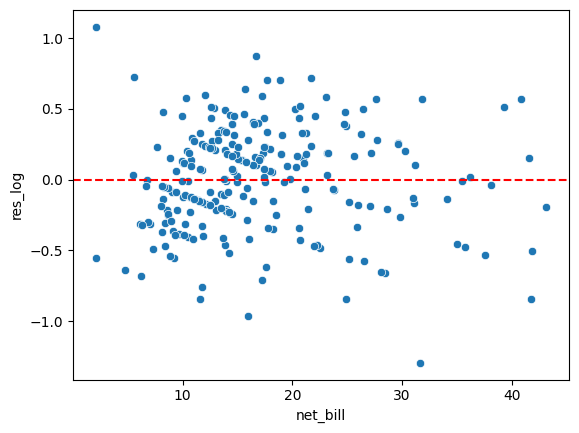

In [ ]:
#3)

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
#4)

y_log, X_log = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', tips)

In [ ]:
modelo_log = sm.OLS(y_log,X_log).fit()

modelo_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           5.62e-22
Time:                        19:29:10   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_log, X_log = patsy.dmatrices('np.log(tip) ~ np.power(net_bill, 2)', tips)

In [ ]:
modelo_log = sm.OLS(y_log,X_log).fit()

modelo_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           7.70e-17
Time:                        19:29:10   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7894      0.034     23.273      0.000       0.723       0.856
np.power(net_bill, 2)     0.0006   6.86e-05      8.982      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.469   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                2.507
Skew:                          -0.240   Prob(JB):                        0.285
Kurtosis:                       2.874   Cond. No.                         692.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

melhor modelo: y_log, X_log = patsy.dmatrices('np.log(tip) ~ np.log(net_bill)', tips)

5) no exercício anterior foi feito esse modelo: y, X = patsy.dmatrices('tip ~ np.log(net_bill)', tips), e comparando os R², o melhor modelo pra explicar seria o que tem o LOG do tip, com R² de 0.319

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [ ]:
df = pd.read_csv('previsao_de_renda.csv')

In [ ]:
#1)
reg = smf.ols('renda ~ tempo_emprego', data = df).fit()


In [ ]:
#2)

df['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:29:10   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

melhorando o *modelo*

In [ ]:
reg = smf.ols('np.log(renda) ~ tempo_emprego', data = df).fit()

In [ ]:
df['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:29:10   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

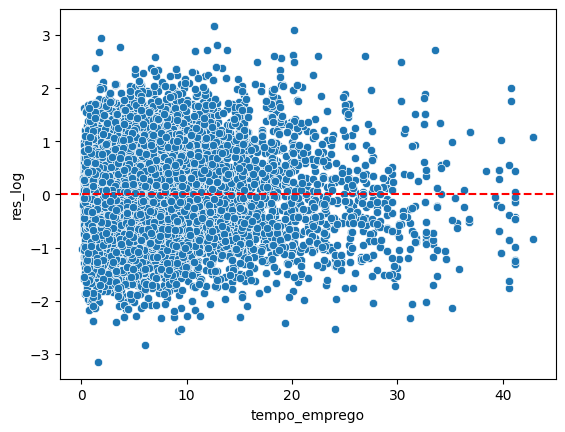

In [ ]:
sns.scatterplot(x = 'tempo_emprego', y = 'res_log', data = df)
plt.axhline(y=0, color='r', linestyle='--')

In [ ]:
#3)
reg2 = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia',
               data = df).fit()

In [ ]:
df['res_log'] = reg2.resid

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     86.04
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:29:11   Log-Likelihood:            -1.5565e+05
No. Observations:               15000   AIC:                         3.114e+05
Df Residuals:                   14976   BIC:                         3.115e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5416.2939   2439.192     -2.221      0.026   -1.02e+04    -635.178
sexo[T.M]                         5306.2325    149.565     35.478      0.000    5013.067    5599.398
posse_de_veiculo[T.True]           -57.0279    142.058     -0.401      0.688    -335.479     221.424
posse_de_imovel[T.True]            203.5110    139.957      1.454      0.146     -70.821     477.843
tipo_renda[T.Bolsista]           -1182.1981   2597.874     -0.455      0.649   -6274.350    3909.954
tipo_renda[T.Empresário]           204.2057    160.244      1.274      0.203    -109.892     518.303
tipo_renda[T.Pensionista]        -3768.4307    223.674    -16.848      0.000   -4206.860   -3330.002
tipo_renda[T.Servidor público]    1457.2049    237.657      6.132      0.000     991.368    1923.042
educacao[T.Pós graduação]        -1052.2954   1645.432     -0.640      0.522   -4277.543    2172.952
educacao[T.Secundário]             419.6808    613.207      0.684      0.494    -782.280    1621.642
educacao[T.Superior completo]     1116.7147    618.072      1.807      0.071     -94.782    2328.211
educacao[T.Superior incompleto]    211.5156    691.326      0.306      0.760   -1143.568    1566.599
estado_civil[T.Separado]           711.7650   1168.317      0.609      0.542   -1578.280    3001.810
estado_civil[T.Solteiro]           746.6734   1145.839      0.652      0.515   -1499.312    2992.659
estado_civil[T.União]             -419.0412    250.496     -1.673      0.094    -910.044      71.962
estado_civil[T.Viúvo]              287.1642   1179.066      0.244      0.808   -2023.949    2598.277
tipo_residencia[T.Casa]            459.3835    566.125      0.811      0.417    -650.291    1569.058
tipo_residencia[T.Com os pais]     -78.5372    635.471     -0.124      0.902   -1324.137    1167.063
tipo_residencia[T.Comunitário]   -1316.6044   1125.856     -1.169      0.242   -3523.420     890.211
tipo_residencia[T.Estúdio]        1394.1227   1023.186      1.363      0.173    -611.447    3399.692
tipo_residencia[T.Governamental]   973.0529    672.420      1.447      0.148    -344.972    2291.077
qtd_filhos                        -638.5561   1138.094     -0.561      0.575   -2869.359    1592.247
idade                              156.0997      7.938     19.666      0.000     140.541     171.659
qt_pessoas_residencia              891.3544   1135.989      0.785      0.433   -1335.324    3118.032
==============================================================================
Omnibus:                    21817.909   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13308896.857
Skew:                           8.594   Prob(JB):                         0.00
Kurtosis:                     147.910   

In [ ]:
#4) retirando variáveis não significativas

reg2 = smf.ols('np.log(renda) ~ sexo + tipo_renda + np.log(idade)', data = df).fit()

In [ ]:
df['res_log'] = reg2.resid

reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     556.7
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:29:11   Log-Likelihood:                -17916.
No. Observations:               15000   AIC:                         3.585e+04
Df Residuals:                   14993   BIC:                         3.590e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          5.3306      0.113     46.989      0.000       5.108       5.553
sexo[T.M]                          0.7409      0.014     51.574      0.000       0.713       0.769
tipo_renda[T.Bolsista]             0.3284      0.267      1.232      0.218      -0.194       0.851
tipo_renda[T.Empresário]           0.0982      0.016      6.013      0.000       0.066       0.130
tipo_renda[T.Pensionista]         -0.4052      0.022    -18.613      0.000      -0.448      -0.363
tipo_renda[T.Servidor público]     0.2312      0.024      9.524      0.000       0.184       0.279
np.log(idade)                      0.7108      0.030     23.366      0.000       0.651       0.770
==============================================================================
Omnibus:                       82.635   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.118
Skew:                           0.143   Prob(JB):                     1.64e-20
Kurtosis:                       3.254   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='sexo', ylabel='res_log'>

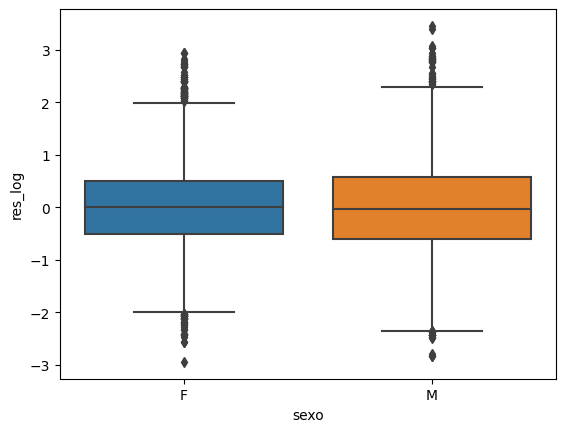

In [ ]:
sns.boxplot(x = 'sexo', y = 'res_log', data = df)


<Axes: xlabel='tipo_renda', ylabel='res_log'>

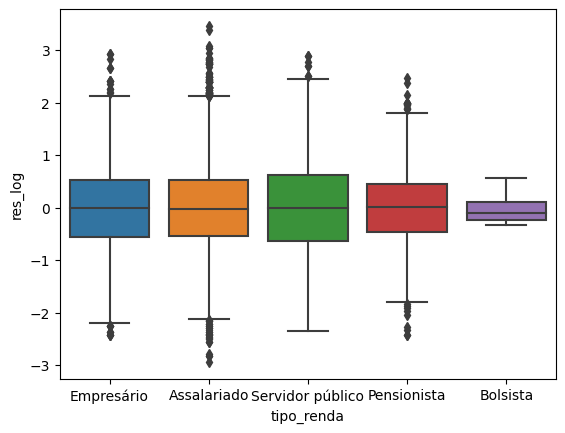

In [ ]:
sns.boxplot(x = 'tipo_renda', y = 'res_log', data = df)

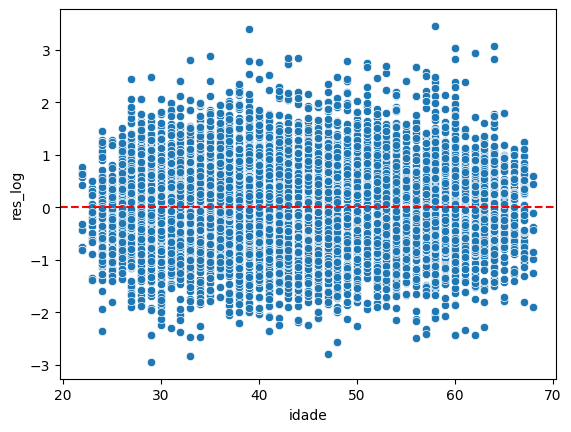

In [ ]:
sns.scatterplot(x = 'idade', y = 'res_log', data = df)
plt.axhline(y=0, color='r', linestyle='--')